# 1. Tính Cosine Similarity

In [ ]:
import pandas as pd

file_path = '/content/Data.csv'
with open(file_path, 'r', encoding='Windows-1252', errors='replace') as f:
    content = f.readlines()

with open('/content/temp_cleaned.csv', 'w', encoding='utf-8-sig') as temp_file:
    temp_file.writelines(content)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

file_path = '/content/temp_cleaned.csv'
data = pd.read_csv(file_path)


if 'Response_LLM' in data.columns and 'Response_Ubuntu' in data.columns:
    responses_gpt = data['Response_LLM'].astype(str)
    responses_ubuntu = data['Response_Ubuntu'].astype(str)

    combined_responses = responses_gpt + responses_ubuntu
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(combined_responses)

    tfidf_gpt = tfidf_vectorizer.transform(responses_gpt)
    tfidf_ubuntu = tfidf_vectorizer.transform(responses_ubuntu)

    similarities = cosine_similarity(tfidf_gpt, tfidf_ubuntu)
    data['CosineSimilarity_LLM-Ubuntu'] = [similarities[i, i] for i in range(len(similarities))]

    file_path = '/content/Data.csv'
    data.to_csv(file_path, index=False)
    print(f"Kết quả đã được ghi vào cột 'Cosine Similarity' trong file: {file_path}")
else:
    print("Các cột không tồn tại trong file CSV.")


Kết quả đã được ghi vào cột 'Cosine Similarity' trong file: /content/Data.csv


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

file_path = '/content/temp_cleaned.csv'
data = pd.read_csv(file_path)


if 'Response_GPT' in data.columns and 'Response_Ubuntu' in data.columns:
    responses_gpt = data['Response_GPT'].astype(str)
    responses_ubuntu = data['Response_Ubuntu'].astype(str)

    combined_responses = responses_gpt + responses_ubuntu
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(combined_responses)

    tfidf_gpt = tfidf_vectorizer.transform(responses_gpt)
    tfidf_ubuntu = tfidf_vectorizer.transform(responses_ubuntu)

    similarities = cosine_similarity(tfidf_gpt, tfidf_ubuntu)
    data['CosineSimilarity_GPT-Ubuntu'] = [similarities[i, i] for i in range(len(similarities))]

    file_path = '/content/Data.csv'
    data.to_csv(file_path, index=False)
    print(f"Kết quả đã được ghi vào cột 'Cosine Similarity' trong file: {file_path}")
else:
    print("Các cột không tồn tại trong file CSV.")


Kết quả đã được ghi vào cột 'Cosine Similarity' trong file: /content/Data.csv


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

file_path = '/content/temp_cleaned.csv'
data = pd.read_csv(file_path)



if 'Response_Cowrie' in data.columns and 'Response_Ubuntu' in data.columns:
    responses_gpt = data['Response_Cowrie'].astype(str)
    responses_ubuntu = data['Response_Ubuntu'].astype(str)

    combined_responses = responses_gpt + responses_ubuntu
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(combined_responses)

    tfidf_gpt = tfidf_vectorizer.transform(responses_gpt)
    tfidf_ubuntu = tfidf_vectorizer.transform(responses_ubuntu)

    similarities = cosine_similarity(tfidf_gpt, tfidf_ubuntu)
    data['CosineSimilarity_Cowrie-Ubuntu'] = [similarities[i, i] for i in range(len(similarities))]

    file_path = '/content/Data.csv'
    data.to_csv(file_path, index=False)
    print(f"Kết quả đã được ghi vào cột 'Cosine Similarity' trong file: {file_path}")
else:
    print("Các cột không tồn tại trong file CSV.")


Kết quả đã được ghi vào cột 'Cosine Similarity' trong file: /content/Data.csv


# 2. Đánh giá

## 2.1 So sánh Cosine Similarity

Các cột trong file CSV: Index(['Command', 'Response_LLM', 'Response_GPT', 'Response_Cowrie',
       'Response_Ubuntu', 'CosineSimilarity_LLM-Ubuntu',
       'CosineSimilarity_GPT-Ubuntu', 'CosineSimilarity_Cowrie-Ubuntu',
       'echo_Ubuntu'],
      dtype='object')


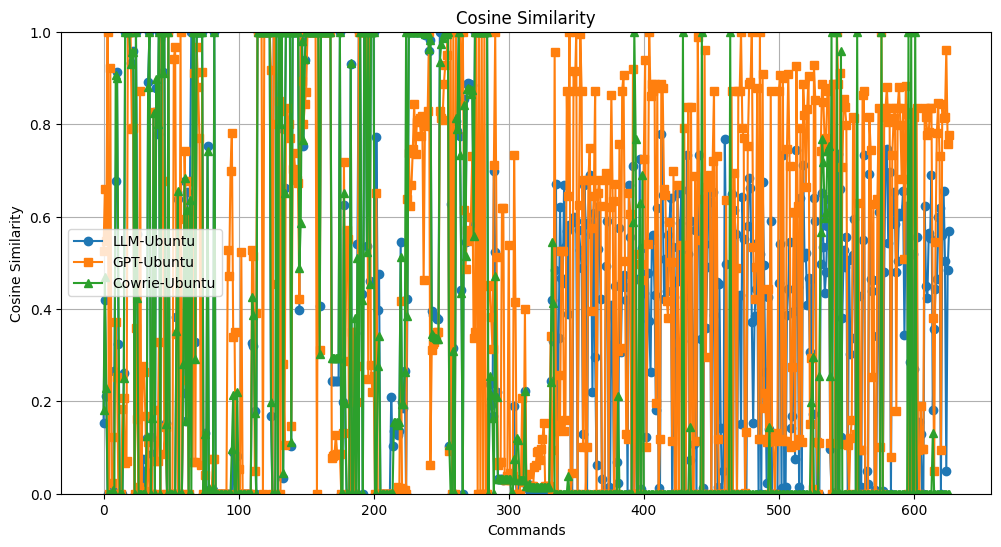

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Data.csv")

print("Các cột trong file CSV:", df.columns)

plt.figure(figsize=(12, 6))

plt.plot(df.index, df['CosineSimilarity_LLM-Ubuntu'], label='LLM-Ubuntu', marker='o')
plt.plot(df.index, df['CosineSimilarity_GPT-Ubuntu'], label='GPT-Ubuntu', marker='s')
plt.plot(df.index, df['CosineSimilarity_Cowrie-Ubuntu'], label='Cowrie-Ubuntu', marker='^')

plt.xlabel('Commands')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)

plt.show()


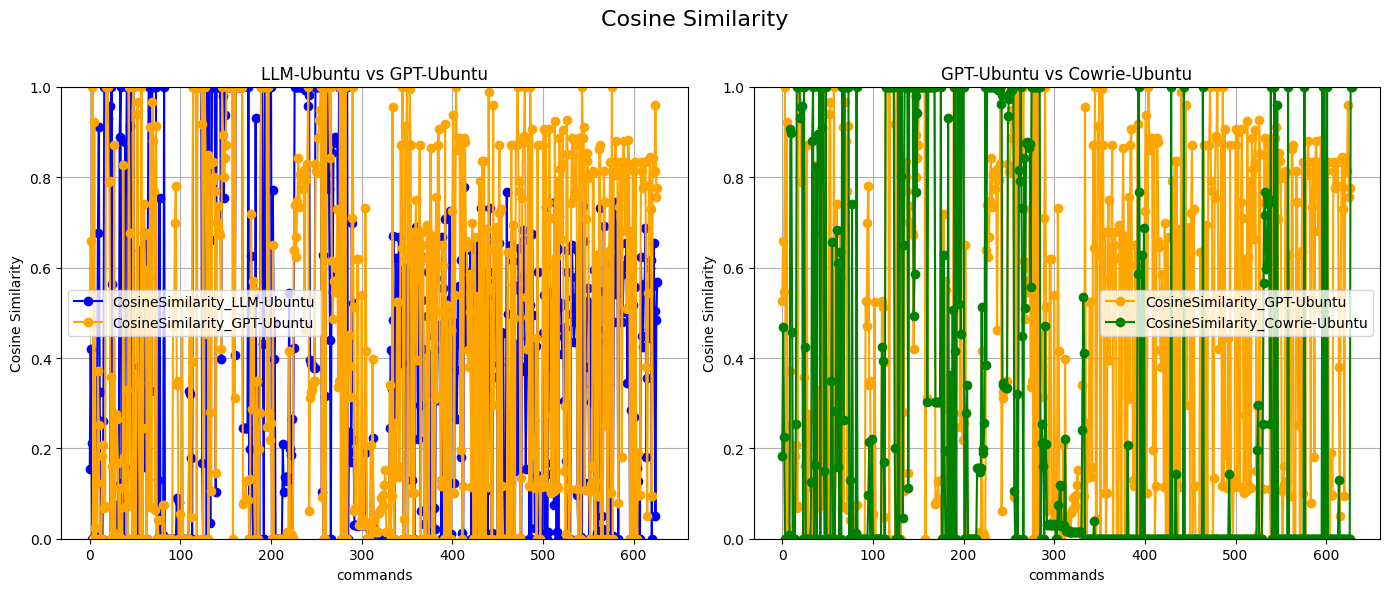

Đã lưu biểu đồ vào tệp 'CosineSimilarity.png'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Data.csv")

pair1 = ['CosineSimilarity_LLM-Ubuntu', 'CosineSimilarity_GPT-Ubuntu']
pair2 = ['CosineSimilarity_GPT-Ubuntu', 'CosineSimilarity_Cowrie-Ubuntu']

colors1 = ['blue', 'orange']
colors2 = ['orange', 'green']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


for i, (col, color) in enumerate(zip(pair1, colors1)):
    axes[0].plot(df.index, df[col], label=col, marker='o', color=color)
axes[0].set_xlabel('commands')
axes[0].set_ylabel('Cosine Similarity')
axes[0].set_title('LLM-Ubuntu vs GPT-Ubuntu')
axes[0].set_ylim(0, 1)
axes[0].grid(True)
axes[0].legend()

for i, (col, color) in enumerate(zip(pair2, colors2)):
    axes[1].plot(df.index, df[col], label=col, marker='o', color=color)
axes[1].set_xlabel('commands')
axes[1].set_ylabel('Cosine Similarity')
axes[1].set_title('GPT-Ubuntu vs Cowrie-Ubuntu')
axes[1].set_ylim(0, 1)
axes[1].grid(True)
axes[1].legend()

fig.suptitle('Cosine Similarity', fontsize=16)


plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('/content/CosineSimilarity.png', dpi=300, bbox_inches='tight')


plt.show()
print("Đã lưu biểu đồ vào tệp 'CosineSimilarity.png'")


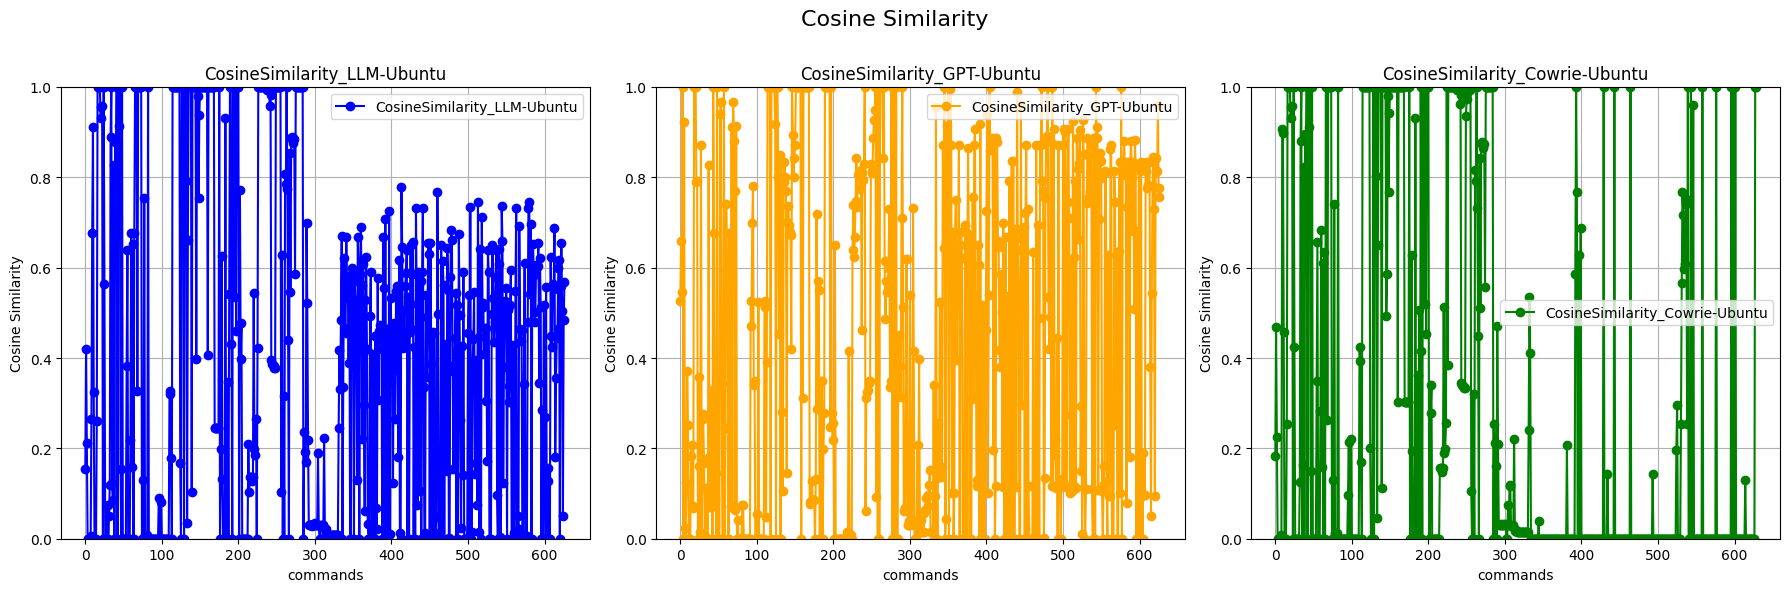

Đã lưu biểu đồ vào tệp 'CosineSimilarity.png'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Data.csv")
columns_to_plot = ['CosineSimilarity_LLM-Ubuntu', 'CosineSimilarity_GPT-Ubuntu', 'CosineSimilarity_Cowrie-Ubuntu']

colors = ['blue', 'orange', 'green']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (col, color) in enumerate(zip(columns_to_plot, colors)):
    axes[i].plot(df.index, df[col], label=col, marker='o', color=color)
    axes[i].set_xlabel('commands')
    axes[i].set_ylabel('Cosine Similarity')
    axes[i].set_title(f'{col}')
    axes[i].set_ylim(0, 1)
    axes[i].grid(True)
    axes[i].legend()

fig.suptitle('Cosine Similarity', fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('/content/CosineSimilarity.png', dpi=300, bbox_inches='tight')


plt.show()
print("Đã lưu biểu đồ vào tệp 'CosineSimilarity.png'")


## 2.2 So sánh Accuracy, Temptation, Logic Compliance

In [ ]:
import pandas as pd

data = pd.read_csv("/content/Data.csv")

def classify_row(row):
    result = {}

    if row['echo_Ubuntu'] == "0":
        result['LLM'] = 'SALC' if row['CosineSimilarity_LLM-Ubuntu'] >= 0.7 else 'SALNLC'
        result['GPT'] = 'SALC' if row['CosineSimilarity_GPT-Ubuntu'] >= 0.7 else 'SALNLC'
        result['Cowrie'] = 'SALC' if row['CosineSimilarity_Cowrie-Ubuntu'] >= 0.7 else 'SALNLC'
    else:
        result['LLM'] = 'FALC' if row['CosineSimilarity_LLM-Ubuntu'] >= 0.7 else 'FALNLC'
        result['GPT'] = 'FALC' if row['CosineSimilarity_GPT-Ubuntu'] >= 0.7 else 'FALNLC'
        result['Cowrie'] = 'FALC' if row['CosineSimilarity_Cowrie-Ubuntu'] >= 0.7 else 'FALNLC'

    return pd.Series(result)

data[['LLM', 'GPT', 'Cowrie']] = data.apply(classify_row, axis=1)
data.to_csv("/content/Data.csv", index=False)
print("Phân loại đã hoàn thành. Kết quả được lưu vào Data.csv")



Phân loại đã hoàn thành. Kết quả được lưu vào Data.csv


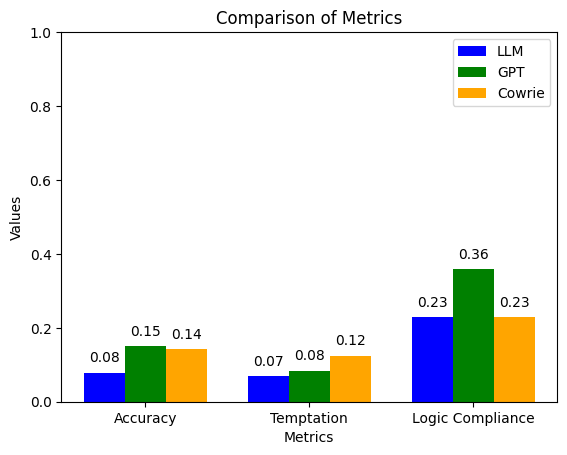

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/Data.csv")

salc_llm = (data['LLM'] == 'SALC').sum()
saln_llm = (data['LLM'] == 'SALNLC').sum()
falc_llm = (data['LLM'] == 'FALC').sum()
total_attacks= 627

temptation_llm = salc_llm / (salc_llm + falc_llm) if (salc_llm + falc_llm) > 0 else 0
logic_compliance_llm = (salc_llm + falc_llm) / total_attacks if total_attacks > 0 else 0
accuracy_llm = salc_llm / (salc_llm + saln_llm) if (salc_llm + saln_llm) > 0 else 0

salc_gpt = (data['GPT'] == 'SALC').sum()
saln_gpt = (data['GPT'] == 'SALNLC').sum()
falc_gpt = (data['GPT'] == 'FALC').sum()

temptation_gpt = salc_gpt / (salc_gpt + falc_gpt) if (salc_gpt + falc_gpt) > 0 else 0
logic_compliance_gpt = (salc_gpt + falc_gpt) / total_attacks if total_attacks > 0 else 0
accuracy_gpt = salc_gpt / (salc_gpt + saln_gpt) if (salc_gpt + saln_gpt) > 0 else 0

salc_cowrie = (data['Cowrie'] == 'SALC').sum()
saln_cowrie = (data['Cowrie'] == 'SALNLC').sum()
falc_cowrie = (data['Cowrie'] == 'FALC').sum()

temptation_cowrie = salc_cowrie / (salc_cowrie + falc_cowrie) if (salc_cowrie + falc_cowrie) > 0 else 0
logic_compliance_cowrie = (salc_cowrie + falc_cowrie) / total_attacks if total_attacks > 0 else 0
accuracy_cowrie = salc_cowrie / (salc_cowrie + saln_cowrie) if (salc_cowrie + saln_cowrie) > 0 else 0


metrics = ['Accuracy', 'Temptation', 'Logic Compliance']
llm_metrics = [accuracy_llm, temptation_llm, logic_compliance_llm]
gpt_metrics = [accuracy_gpt, temptation_gpt, logic_compliance_gpt]
cowrie_metrics = [accuracy_cowrie, temptation_cowrie, logic_compliance_cowrie]

x = range(len(metrics))
width = 0.25

plt.bar([p - width for p in x], llm_metrics, width, label='LLM', color='blue')
plt.bar(x, gpt_metrics, width, label='GPT', color='green')
plt.bar([p + width for p in x], cowrie_metrics, width, label='Cowrie', color='orange')

plt.title('Comparison of Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()

for i, metric_set in enumerate([llm_metrics, gpt_metrics, cowrie_metrics]):
    for j, value in enumerate(metric_set):
        plt.text(j + (i - 1) * width, value + 0.02, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.savefig('/content/ComparisonMetrics.png', dpi=300, bbox_inches='tight')
plt.show()




## 2.4 So sánh Accuracy tại các ngưỡng Cosine Similarity khác nhau

---






So sánh Accuracy tại các ngưỡng Cosine Similarity khác nhau của GPT

Accuracy for Cosine Similarity >= 0.6: 0.18
Accuracy for Cosine Similarity >= 0.65: 0.17
Accuracy for Cosine Similarity >= 0.7: 0.15
Accuracy for Cosine Similarity >= 0.75: 0.13
Accuracy for Cosine Similarity >= 0.8: 0.13
Accuracy for Cosine Similarity >= 0.85: 0.12
Accuracy for Cosine Similarity >= 0.9: 0.12
Accuracy for Cosine Similarity >= 0.95: 0.09


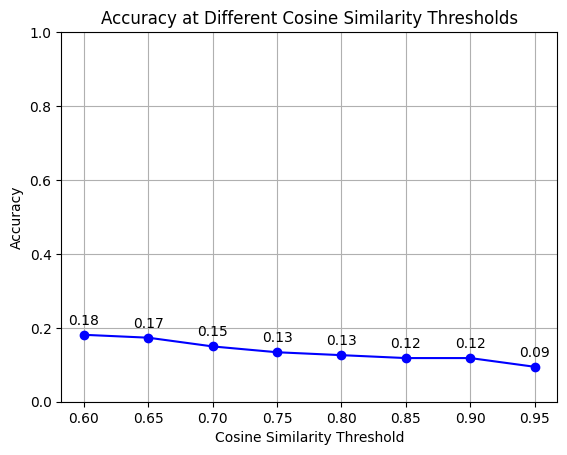

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/Data.csv")

def calculate_accuracy(threshold):
    correct_salc = 0
    total_salc_salnlc = 0

    for _, row in data.iterrows():
        if row['echo_Ubuntu'] == "0":
            classification = 'SALC' if row['CosineSimilarity_GPT-Ubuntu'] >= threshold else 'SALNLC'
        else:
            classification = 'FALC' if row['CosineSimilarity_GPT-Ubuntu'] >= threshold else 'FALNLC'

        if classification == 'SALC':
            correct_salc += 1

        if classification in ['SALC', 'SALNLC']:
            total_salc_salnlc += 1

    accuracy = correct_salc / total_salc_salnlc if total_salc_salnlc > 0 else 0
    return accuracy

thresholds = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
accuracies = {threshold: calculate_accuracy(threshold) for threshold in thresholds}

for threshold, accuracy in accuracies.items():
    print(f"Accuracy for Cosine Similarity >= {threshold}: {accuracy:.2f}")

plt.plot(thresholds, list(accuracies.values()), marker='o', linestyle='-', color='b')
plt.title('Accuracy at Different Cosine Similarity Thresholds')
plt.xlabel('Cosine Similarity Threshold')
plt.ylabel('Accuracy')
plt.xticks(thresholds)
plt.ylim(0, 1)
for x, y in zip(thresholds, accuracies.values()):
    plt.text(x, y + 0.02, f"{y:.2f}", ha='center', va='bottom', fontsize=10)
plt.grid(True)
plt.savefig('/content/Accuracy_GPT.png', dpi=300, bbox_inches='tight')
plt.show()


So sánh temptation tại các ngưỡng Cosine Similarity khác nhau của GPT

Temptation for Cosine Similarity >= 0.6: 0.08
Temptation for Cosine Similarity >= 0.65: 0.09
Temptation for Cosine Similarity >= 0.7: 0.08
Temptation for Cosine Similarity >= 0.75: 0.08
Temptation for Cosine Similarity >= 0.8: 0.09
Temptation for Cosine Similarity >= 0.85: 0.11
Temptation for Cosine Similarity >= 0.9: 0.17
Temptation for Cosine Similarity >= 0.95: 0.17


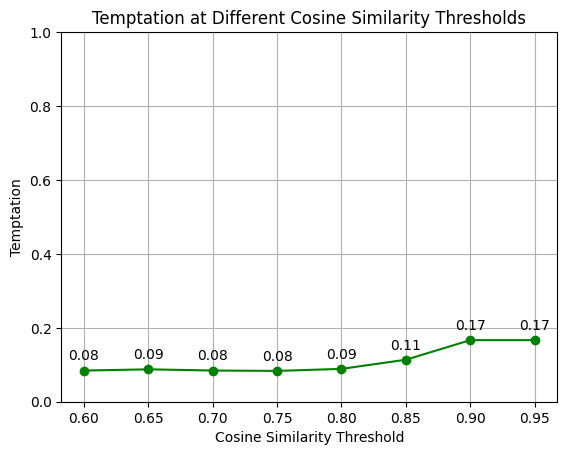

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/Data.csv")

def calculate_temptation(threshold):
    salc = 0
    falc = 0

    for _, row in data.iterrows():
        if row['echo_Ubuntu'] == "0":
            classification = 'SALC' if row['CosineSimilarity_GPT-Ubuntu'] >= threshold else 'SALNLC'
        else:
            classification = 'FALC' if row['CosineSimilarity_GPT-Ubuntu'] >= threshold else 'FALNLC'

        if classification == 'SALC':
            salc += 1
        elif classification == 'FALC':
            falc += 1

    temptation = salc / (salc + falc) if (salc + falc) > 0 else 0
    return temptation

thresholds = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

temptations = {threshold: calculate_temptation(threshold) for threshold in thresholds}

temptation_values = []
for threshold, temptation in temptations.items():
    print(f"Temptation for Cosine Similarity >= {threshold}: {temptation:.2f}")
    temptation_values.append(temptation)

plt.plot(thresholds, temptation_values, marker='o', linestyle='-', color='g')
plt.title('Temptation at Different Cosine Similarity Thresholds')
plt.xlabel('Cosine Similarity Threshold')
plt.ylabel('Temptation')
plt.xticks(thresholds)
plt.ylim(0, 1)

for x, y in zip(thresholds, temptation_values):
    plt.text(x, y + 0.02, f"{y:.2f}", ha='center', va='bottom', fontsize=10)

plt.grid(True)
plt.savefig('/content/Temptation_GPT.png', dpi=300, bbox_inches='tight')
plt.show()


So sánh logic_compliance tại các ngưỡng Cosine Similarity khác nhau của GPT

Logic Compliance for Cosine Similarity >= 0.6: 0.44
Logic Compliance for Cosine Similarity >= 0.65: 0.40
Logic Compliance for Cosine Similarity >= 0.7: 0.36
Logic Compliance for Cosine Similarity >= 0.75: 0.33
Logic Compliance for Cosine Similarity >= 0.8: 0.29
Logic Compliance for Cosine Similarity >= 0.85: 0.21
Logic Compliance for Cosine Similarity >= 0.9: 0.14
Logic Compliance for Cosine Similarity >= 0.95: 0.11


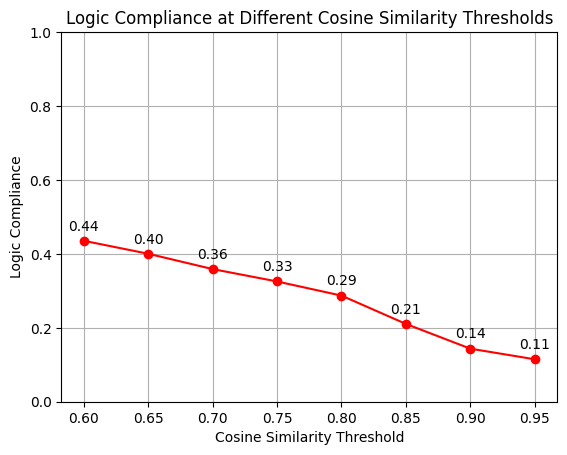

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/Data.csv")

def calculate_logic_compliance(threshold):
    salc = 0
    falc = 0
    total_attacks = 0

    for _, row in data.iterrows():
        if row['echo_Ubuntu'] == "0":
            classification = 'SALC' if row['CosineSimilarity_GPT-Ubuntu'] >= threshold else 'SALNLC'
        else:
            classification = 'FALC' if row['CosineSimilarity_GPT-Ubuntu'] >= threshold else 'FALNLC'

        if classification == 'SALC':
            salc += 1
        elif classification == 'FALC':
            falc += 1

        total_attacks += 1

    logic_compliance = (salc + falc) / total_attacks if total_attacks > 0 else 0
    return logic_compliance

thresholds = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

logic_compliances = {threshold: calculate_logic_compliance(threshold) for threshold in thresholds}

logic_compliance_values = []
for threshold, logic_compliance in logic_compliances.items():
    print(f"Logic Compliance for Cosine Similarity >= {threshold}: {logic_compliance:.2f}")
    logic_compliance_values.append(logic_compliance)

plt.plot(thresholds, logic_compliance_values, marker='o', linestyle='-', color='r')
plt.title('Logic Compliance at Different Cosine Similarity Thresholds')
plt.xlabel('Cosine Similarity Threshold')
plt.ylabel('Logic Compliance')
plt.xticks(thresholds)
plt.ylim(0, 1)

for x, y in zip(thresholds, logic_compliance_values):
    plt.text(x, y + 0.02, f"{y:.2f}", ha='center', va='bottom', fontsize=10)

plt.grid(True)
plt.savefig('/content/Logic_Compliance_GPT.png', dpi=300, bbox_inches='tight')
plt.show()


## 2.5 So sánh tại các ngướng Cosine Similarity khác nhau của 3 honeypot

So sánh Accuracy tại các ngưỡng Cosine Similarity khác nhau của 3 honeypot

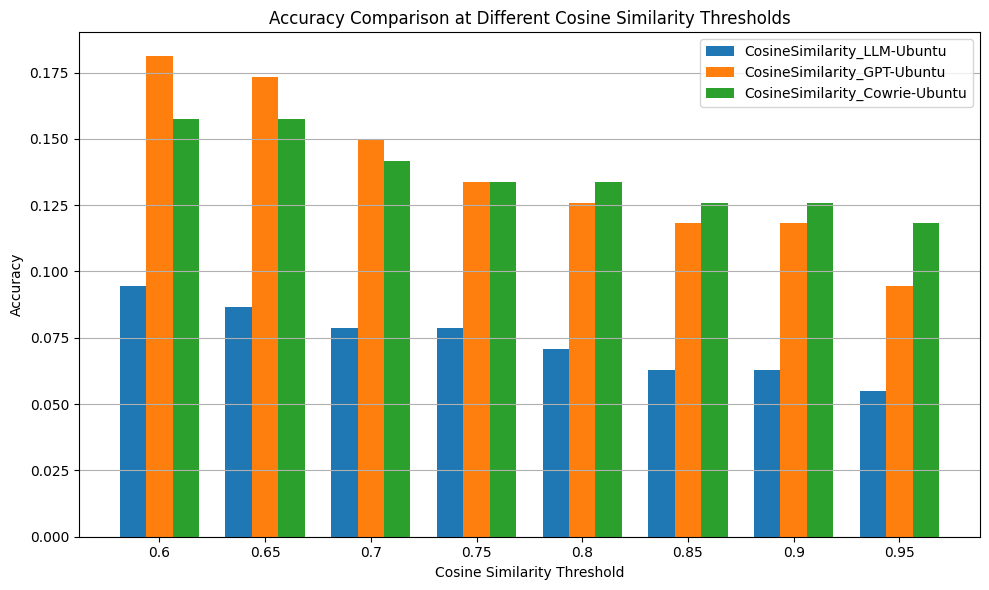

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/Data.csv")

def calculate_accuracy(llm_column, threshold):
    correct_salc = 0
    total_salc_salnlc = 0

    for _, row in data.iterrows():
        if row['echo_Ubuntu'] == "0":
            classification = 'SALC' if row[llm_column] >= threshold else 'SALNLC'
        else:
            classification = 'FALC' if row[llm_column] >= threshold else 'FALNLC'

        if classification == 'SALC':
            correct_salc += 1

        if classification in ['SALC', 'SALNLC']:
            total_salc_salnlc += 1

    accuracy = correct_salc / total_salc_salnlc if total_salc_salnlc > 0 else 0
    return accuracy

thresholds = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
llm_columns = ['CosineSimilarity_LLM-Ubuntu', 'CosineSimilarity_GPT-Ubuntu', 'CosineSimilarity_Cowrie-Ubuntu']

accuracies = {llm: [calculate_accuracy(llm, threshold) for threshold in thresholds] for llm in llm_columns}

x = range(len(thresholds))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

for i, (llm, accuracy) in enumerate(accuracies.items()):
    ax.bar([pos + i * width for pos in x], accuracy, width, label=llm)

ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(thresholds)
ax.set_xlabel('Cosine Similarity Threshold')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison at Different Cosine Similarity Thresholds')
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.savefig('/content/Accuracy_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()


So sánh temptation tại các ngưỡng Cosine Similarity khác nhau của 3 honeypot

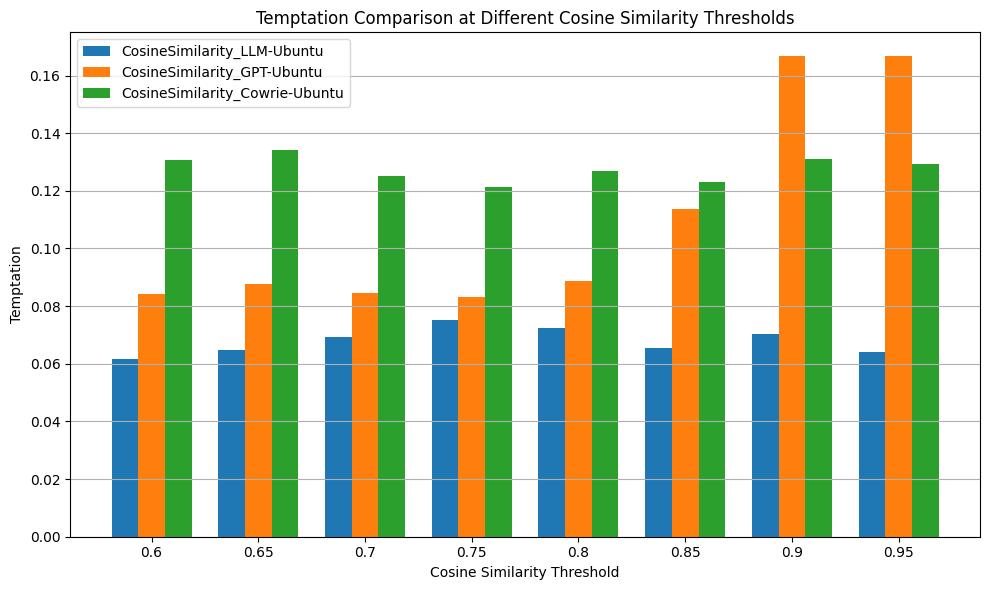

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv("/content/Data.csv")

# Hàm tính temptation cho một LLM với ngưỡng threshold
def calculate_temptation(llm_column, threshold):
    salc = 0
    falc = 0

    for _, row in data.iterrows():
        if row['echo_Ubuntu'] == "0":
            classification = 'SALC' if row[llm_column] >= threshold else 'SALNLC'
        else:
            classification = 'FALC' if row[llm_column] >= threshold else 'FALNLC'

        if classification == 'SALC':
            salc += 1
        elif classification == 'FALC':
            falc += 1

    temptation = salc / (salc + falc) if (salc + falc) > 0 else 0
    return temptation

thresholds = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
llm_columns = ['CosineSimilarity_LLM-Ubuntu', 'CosineSimilarity_GPT-Ubuntu', 'CosineSimilarity_Cowrie-Ubuntu']

temptations = {llm: [calculate_temptation(llm, threshold) for threshold in thresholds] for llm in llm_columns}

x = range(len(thresholds))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

for i, (llm, temptation) in enumerate(temptations.items()):
    ax.bar([pos + i * width for pos in x], temptation, width, label=llm)

ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(thresholds)
ax.set_xlabel('Cosine Similarity Threshold')
ax.set_ylabel('Temptation')
ax.set_title('Temptation Comparison at Different Cosine Similarity Thresholds')
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.savefig('/content/Temptation_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()


So sánh logic_compliance tại các ngưỡng Cosine Similarity khác nhau của 3 honeypot

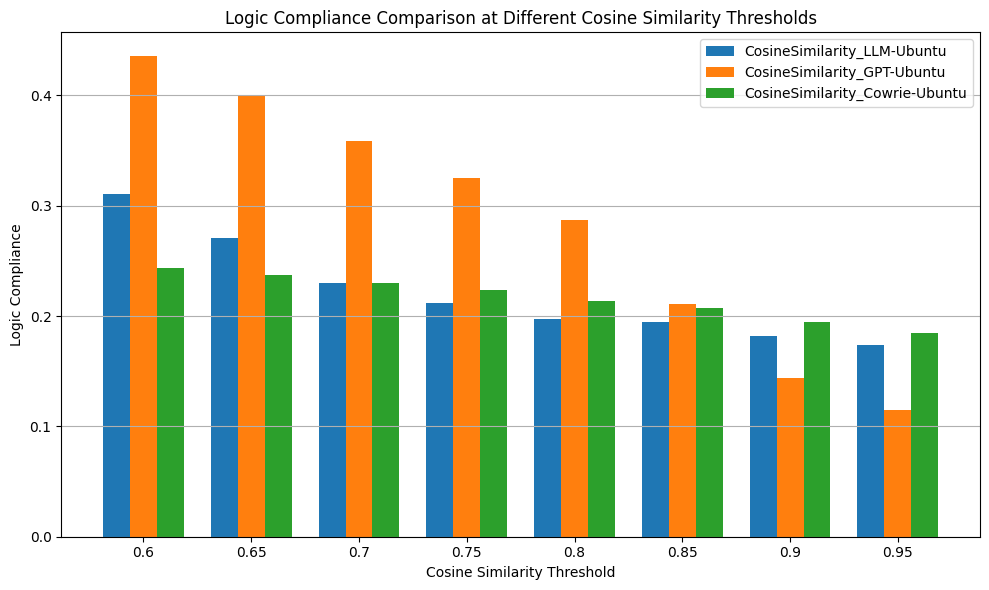

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/Data.csv")

total_attacks = 627

def calculate_logic_compliance(llm_column, threshold):
    salc = 0
    falc = 0

    for _, row in data.iterrows():
        if row['echo_Ubuntu'] == "0":
            classification = 'SALC' if row[llm_column] >= threshold else 'SALNLC'
        else:
            classification = 'FALC' if row[llm_column] >= threshold else 'FALNLC'

        if classification in ['SALC', 'FALC']:
            if classification == 'SALC':
                salc += 1
            elif classification == 'FALC':
                falc += 1

    logic_compliance = (salc + falc) / total_attacks if total_attacks > 0 else 0
    return logic_compliance

thresholds = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
llm_columns = ['CosineSimilarity_LLM-Ubuntu', 'CosineSimilarity_GPT-Ubuntu', 'CosineSimilarity_Cowrie-Ubuntu']

logic_compliances = {llm: [calculate_logic_compliance(llm, threshold) for threshold in thresholds] for llm in llm_columns}

x = range(len(thresholds))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

for i, (llm, compliance) in enumerate(logic_compliances.items()):
    ax.bar([pos + i * width for pos in x], compliance, width, label=llm)

ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(thresholds)
ax.set_xlabel('Cosine Similarity Threshold')
ax.set_ylabel('Logic Compliance')
ax.set_title('Logic Compliance Comparison at Different Cosine Similarity Thresholds')
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.savefig('/content/Logic_Compliance_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()
